# Importing Libraries

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Reading in Data

In [123]:
data_feat = pd.read_csv("train_features.csv")
data_labels = pd.read_csv("train_labels.csv")

pd.set_option('display.max_columns', None)


In [124]:
data_feat.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [125]:
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Left-align the table below instead of centered which is default in Markdown:

In [126]:
%%html
<style>
table {float:left}
</style>

| Column_name   | Description
|:-|:---------------------------------------------------------
| amount_tsh  | Total static head (amount water available to waterpoint)|
| date_recorded | The date the row was entered |
| funder | Who funded the well |
| gps_height | Altitude of the well |
| installer | Organization that installed the well |
| longitude | GPS coordinate |
| latitude | GPS coordinate  |
| wpt_name | Name of the waterpoint if there is one |
| num_private |  N/A |
| basin | Geographic water basin |
| subvillage | Geographic location |
| region | Geographic location |
| region_code | Geographic location (coded) |
| district_code | Geographic location (coded) |
| lga |  Geographic location  |
| ward | Geographic location |
| population | Population around the well |
| public_meeting | True/False |
| recorded_by | Group entering this row of data |
| scheme_management | Who operates the waterpoint |
| scheme_name | Who operates the waterpoint |
| permit | If the waterpoint is permitted |
| construction_year | Year the waterpoint was constructed |
| extraction_type | The kind of extraction the waterpoint uses |
| extraction_type_group | The kind of extraction the waterpoint uses |
| extraction_type_class | The kind of extraction the waterpoint uses  |
| management | How the waterpoint is managed  |
| management_group | How the waterpoint is managed |
| payment | What the water costs |
| payment_type | What the water costs  |
| water_quality | The quality of the water  |
| quality_group | The quality of the water  |
| quantity | The quantity of water |
| quantity_group | The quantity of water  |
| source | The source of the water  |
| source_type | The source of the water  |
| source_class | The source of the water  |
| waterpoint_type | The kind of waterpoint |
| waterpoint_type_group | The kind of waterpoint |

Join the features csv with the labels csv into one training dataframe.

In [127]:
df = data_feat.merge(data_labels, on="id")
df.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
51398,30750,50.0,2011-03-04,Wsdp,26,DWE,38.727663,-6.724701,Msagasa,0,Wami / Ruvu,Kilangalang,Pwani,6,2,Kibaha,Mlandizi,11463,True,GeoData Consultants Ltd,VWC,Borehole,True,2006,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
19711,52688,0.0,2011-03-27,NaN,0,NaN,32.962484,-9.317215,Kwa Shorwa,0,Lake Nyasa,Mbebe,Mbeya,12,5,Ileje,Mbebe,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
1784,11897,0.0,2011-07-19,Hesawa,0,DWE,30.911482,-1.725897,Kwafransi,0,Lake Victoria,Kijumbura,Kagera,18,1,Karagwe,Bweranyange,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
25185,34940,0.0,2011-07-19,Hesawa,0,DWE,31.459067,-2.837073,Shuleni,0,Lake Tanganyika,Nyabusozi,Kagera,18,4,Biharamulo,Nyabusozi,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional needs repair
27721,60497,0.0,2011-07-06,Hewasa,0,DWE,31.517362,-1.601114,Shule Ya Msingi Nyakaju,0,Lake Victoria,Rubale,Kagera,18,2,Bukoba Rural,Rubale,0,True,GeoData Consultants Ltd,VWC,OLD RUBALE WATER SUPPLY SCHEME,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair


## Exploratory Data Analysis



In [128]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

The dataframe contains 41 columns and 59400 rows. There are null-values present in the following features:
* funder (object)
* installer (object)
* subvillage (object)
* public_meeting (object)
* scheme_management (object)
* scheme_name (object)
* permit (object)

All of the features share the same object data type and could indicate a human or equipment error. These features will require further investigation.

The data types for all features are as follows:
* 3 floats
* 7 ints
* 31 objects

The target label is also an object which will slow down our ML models further down the line compared to a category data type. The many objects data types could potentially also be converted into ones that more accurately reflect the data.

In [129]:
# pct of cells with missing values out of all cells
total_cells = np.product(df.shape)
total_missing_values = df.isnull().sum().sum()
pct_missing = (total_missing_values / total_cells * 100)
print("Percentage of cells with null-values: {0:.1f}%".format(pct_missing))

Percentage of cells with null-values: 1.9%


Around 2% of cells contain null-values. However, there may be more null-values but just represented as empty cells, "N/A" strings or something else completely. Let's investigate the values inside features we have already identified as containing null-values.

In [130]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Exploring categorical features

It appears that the largest concentration of null-values exist in scheme_name which represent who is operating the waterpoints. Perhaps this is indicative of many water pumps not being maintained nor in operation.

In [131]:
print("Funder contains {} unique entities that have funded wells in Tanzania.".format(len(df.funder.unique())))
print("\nCount of each funder in the dataset:\n{}".format(df.funder.value_counts()))

Funder contains 1898 unique entities that have funded wells in Tanzania.

Count of each funder in the dataset:
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                470
Hifab                      450
Adb                        448
Lga                        442
Amref                      425
Fini Water                 393
Oxfam                      359
Wateraid                   333
Rc Church            

Notice there are 777 observations of "0" likely to represent a null-value. This is in addition to the null-values and would need to be cleaned in the data cleaning section.

In [132]:
print("Installer contains {} unique entities with the name of the organisation that installed the well.".format(len(df.installer.unique())))
print("\nCount of each installer in the dataset:\n{}".format(df.installer.value_counts()))

Installer contains 2146 unique entities with the name of the organisation that installed the well.

Count of each installer in the dataset:
DWE                         17402
Government                   1825
RWE                          1206
Commu                        1060
DANIDA                       1050
KKKT                          898
Hesawa                        840
0                             777
TCRS                          707
Central government            622
CES                           610
Community                     553
DANID                         552
District Council              551
HESAWA                        539
World vision                  408
LGA                           408
WEDECO                        397
TASAF                         396
District council              392
Gover                         383
AMREF                         329
TWESA                         316
WU                            301
Dmdd                          287
ACRA      

Again, we have 777 counts of "0" highly likely showing that for wells where funder is missing installer also is missing.

In [133]:
print("Subvillage contains {} unique entities with the geographic location of the wells.".format(len(df.subvillage.unique())))
print("\nCount of each subvillage in the dataset:\n{}".format(df.subvillage.value_counts()))

Subvillage contains 19288 unique entities with the geographic location of the wells.

Count of each subvillage in the dataset:
Madukani                508
Shuleni                 506
Majengo                 502
Kati                    373
Mtakuja                 262
Sokoni                  232
M                       187
Muungano                172
Mbuyuni                 164
Mlimani                 152
Songambele              147
Miembeni                134
Msikitini               134
1                       132
Kibaoni                 114
Kanisani                111
I                       109
Mapinduzi               109
Mjini                   108
Mjimwema                108
Mkwajuni                104
Mwenge                  102
Azimio                   98
Mabatini                 98
Mission                  95
Mbugani                  95
Bwawani                  91
Bondeni                  90
Chang'Ombe               88
Zahanati                 86
                       ... 
Namuy

The values "M", "1" and "I" appear to be null-values but required further analysis before we can determine they truly are missing values or incorrectly entered values due to human error.

In [134]:
print("Public_meeting contains {} unique entities evaluating to either True/False or null-value.".format(len(df.public_meeting.unique())))
print("\nCount of each public_meeting in the dataset:\n{}".format(df.public_meeting.value_counts()))

Public_meeting contains 3 unique entities evaluating to either True/False or null-value.

Count of each public_meeting in the dataset:
True     51011
False     5055
Name: public_meeting, dtype: int64


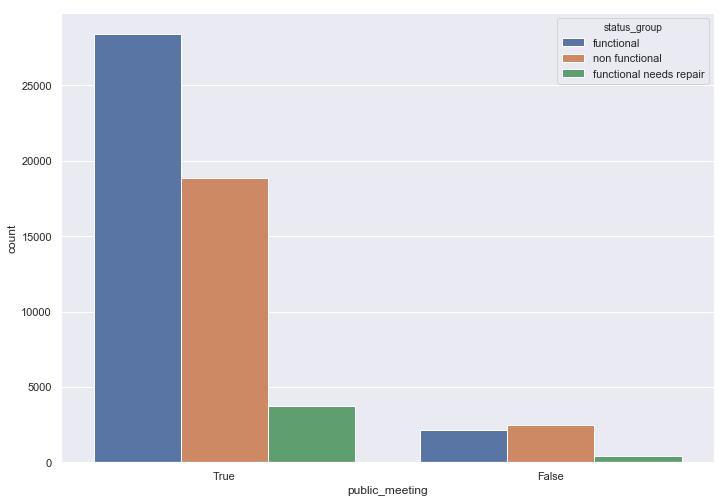

In [135]:
sns.countplot(data=df, x='public_meeting', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

It is not clear what public_meeting represents beyond true/false values but there are many more waterpoints that are functional or non-functional that evaluate to True in public_meeting.

In [136]:
print("Scheme_management contains {} unique entities with the names of who operates the waterpoints.".format(len(df.scheme_management.unique())))
print("\nCount of each scheme_management in the dataset:\n{}".format(df.scheme_management.value_counts()))

Scheme_management contains 13 unique entities with the names of who operates the waterpoints.

Count of each scheme_management in the dataset:
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64


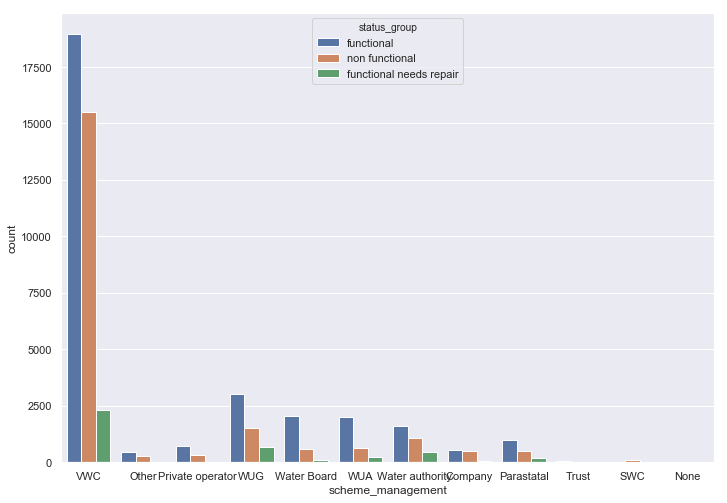

In [137]:
sns.countplot(data=df, x='scheme_management', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

While scheme_management and scheme_name appear to have the same column description their values are not identical.

In [138]:
print("Scheme_name contains {} unique entities with the names of who operates the waterpoints.".format(len(df.scheme_name.unique())))
print("\nCount of each scheme_name in the dataset:\n{}".format(df.scheme_name.value_counts()))

Scheme_name contains 2697 unique entities with the names of who operates the waterpoints.

Count of each scheme_name in the dataset:
K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
Bagamoyo wate                            229
I                                        229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
Handeni Trun

In [139]:
print("Permit contains {} unique entities indicating whether waterpoints had permits".format(len(df.permit.unique())))
print("\nCount of each permit in the dataset:\n{}".format(df.permit.value_counts()))

Permit contains 3 unique entities indicating whether waterpoints had permits

Count of each permit in the dataset:
True     38852
False    17492
Name: permit, dtype: int64


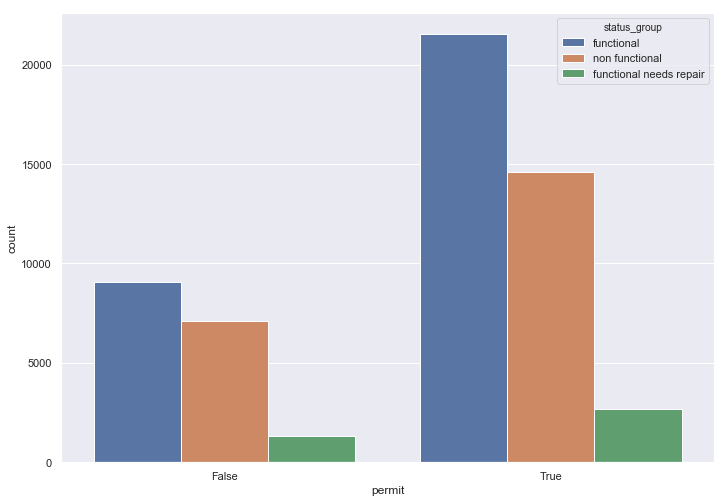

In [140]:
sns.countplot(data=df, x='permit', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

The net amount of waterpoints that are functional, non-functional and functional but needs repair are around twice as high for waterpoints that have a permit compared to those that don't. This means we have more data on waterpoints with a permit than those without.

### Exploring numerical features

Let's now explore the numerical features (dtypes ints and floats). They are as follows:
* amount_tsh (amount of water available to the waterpoint)
* gps_height (altitude of the well)
* longtitude (GPS coordinate)
* latitude (GPS coordinate)
* num_private (unknown)
* region_code (geographic location)
* district_code (geographic location)
* population (population around a well)
* construction_year (year the well was constructed)

The amount of water available to a waterpoint could be a proxy for how much a well is used and therefore could be closely correlated with the target labels we are trying to predict.

Amount of water available to the water point values range from 0.0 to 350000.0
Amount of water available distribution of values:  0.00         41639
500.00        3102
50.00         2472
1000.00       1488
20.00         1463
200.00        1220
100.00         816
10.00          806
30.00          743
2000.00        704
250.00         569
300.00         557
5000.00        450
5.00           376
25.00          356
3000.00        334
1200.00        267
1500.00        197
6.00           190
600.00         176
4000.00        156
2400.00        145
2500.00        139
6000.00        125
7.00            69
8000.00         61
750.00          59
40.00           59
10000.00        57
12000.00        51
             ...  
16000.00         2
16300.00         2
800.00           2
11000.00         2
590.00           2
520.00           2
26000.00         2
13000.00         2
9.00             1
170000.00        1
200000.00        1
900.00           1
0.25             1
53.00            1
350000.00      

C:\Users\ammar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


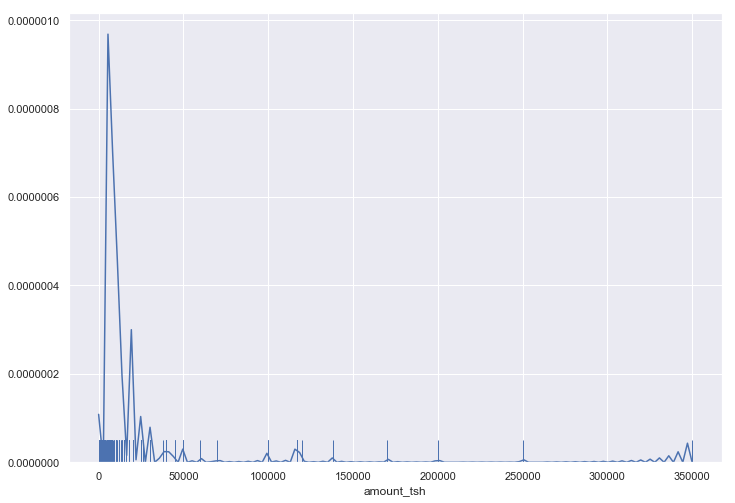

In [141]:
print("Amount of water available to the water point values range from {} to {}".format(df.amount_tsh.min(), df.amount_tsh.max()))
print("Amount of water available distribution of values: ", df.amount_tsh.value_counts())
sns.distplot(df.amount_tsh, hist=False, rug=True, bins=50)

Most of the values in "amount_tsh" range between 0 and 3,000 which means that the water available to pumps is in the lower end of the range through Tanzania.

Population values range from 0 to 30500
Distribution of Populationalue counts:  0       21381
1        7025
200      1940
150      1892
250      1681
300      1476
100      1146
50       1139
500      1009
350       986
120       916
400       775
60        706
30        626
40        552
80        533
450       499
20        462
600       438
230       388
75        289
1000      278
800       269
90        265
130       264
25        255
320       249
35        245
360       222
140       215
        ...  
8848        1
628         1
4520        1
468         1
693         1
725         1
789         1
821         1
5300        1
3127        1
2345        1
3031        1
886         1
392         1
424         1
2807        1
726         1
694         1
2569        1
4788        1
662         1
4660        1
406         1
1032        1
1160        1
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64


C:\Users\ammar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


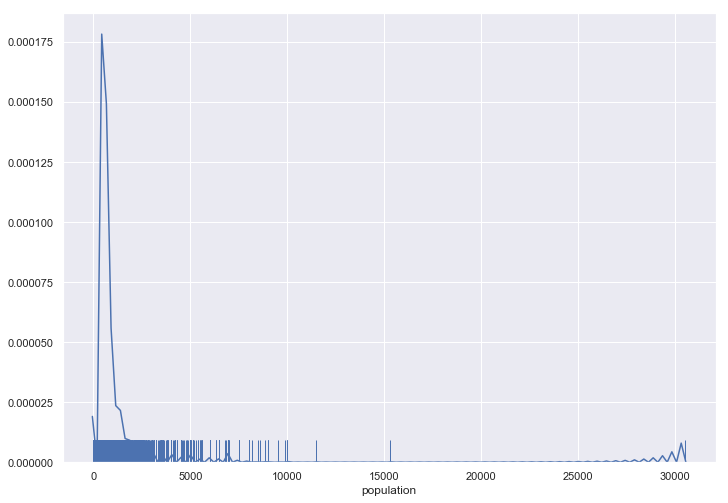

In [142]:
print("Population values range from {} to {}".format(df.population.min(), df.population.max()))
print("Distribution of Populationalue counts: ", df.population.value_counts())
sns.distplot(df.population, hist=False, rug=True, bins=50)


It is clear that "population" is skewed right (positive) with the highest count of populations between 1 nd 5,000 thus indicating we are dealing with extremely small communities around these waterpoints. There are a few population sizes above 30,000 as well. The distplot above indicates that values greater than 10,000 are likely outliers and will need to be cleaned pre-modelling.

In [143]:
df[['population', 'amount_tsh']].corr()

,population,amount_tsh
population,1.000000,0.016288
amount_tsh,0.016288,1.000000


Although the distribution of values for both amount_tsh and population look similar they are not at all closely correlated.

### Exploring target labels

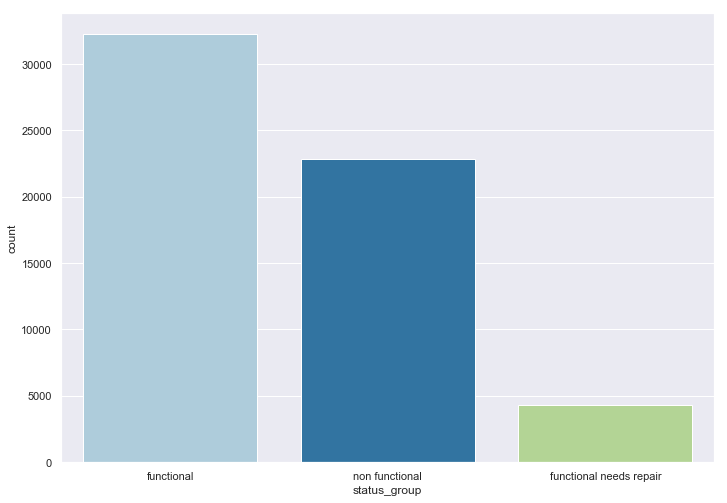

In [144]:
sns.countplot(data=df, x="status_group", palette="Paired")


In [145]:
labels_count = df.status_group.value_counts()
total_labels = df.status_group.count()
(labels_count/total_labels)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

The target label "functional" accounts for 54% of all labels in the dataset, and "non-functional" for 38%. The only significantly imbalanced class is "functional needs repair" which only accounts for 7% of the data.

### Correlations

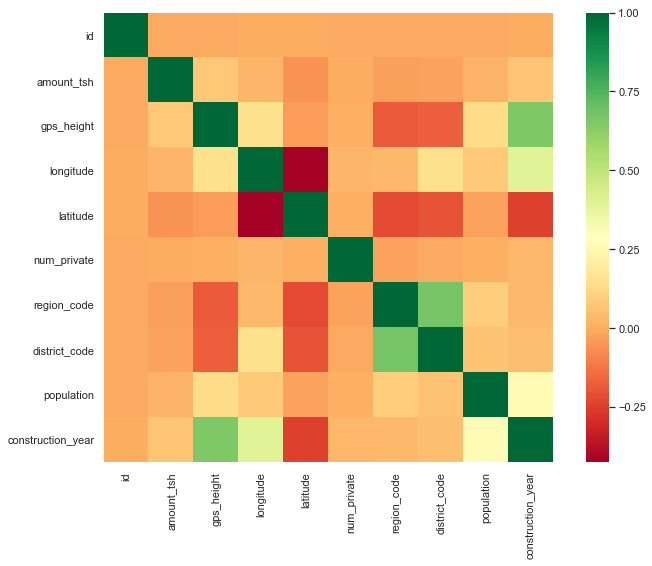

In [146]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

The heatmap shows "construction_year" and "gps_height" have a strong positive correlation. Likewise with "district_code" and "region_code". This indicates that we can potentially drop 2 features whereby reducing the dimensions used to train our model making it simpler and less prone to overfitting. This is due to the fact that when we have two correlated features one feature will explain the variance already and the other is not needed.

## Data Preprocessing

### Data Cleaning

To-do:
- Convert "date_recorded" into datetime object.
- Consider converting "0" into nulls for "funder" and "installer"
- Compare model performance when removing "M", "1" and "I" in "subvillage" vs. keeping them.
- Compare model performance when removing "K", "M", "I", "N" and "S" in "scheme_name" vs. keeping them.
- Values greater than 10,000 in "population" appear to be outliers and needs cleaning.
- Replace "none" in "wpt_name" with null-value

In [151]:
# Convert date_recorded into a datetime object for further engineering
df['date_recorded'] = pd.to_datetime(df['date_recorded'], infer_datetime_format=True)
df.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


### Feature Engineering

In [118]:
# Creating new features from the date_recorded feature representing the date the row was entered into the dataset.
df['year_recorded'] = df['date_recorded'].dt.year
df['month_recorded'] = df['date_recorded'].dt.month 
df['weekday_recorded'] = df['date_recorded'].dt.week

# Transform "construction_year" dtype into int to do operations so we can calculate the years difference 
# from when a waterpoint was constructed and when it was last checked.
df['construction_year'] = df['construction_year'].astype("int64")
df['age_of_pump'] = df['year_recorded'].values - df['construction_year'].values
df[['year_recorded', 'construction_year', 'month_recorded', 'weekday_recorded', 'age_of_pump']].head(10)


,year_recorded,construction_year,month_recorded,weekday_recorded,age_of_pump
0,2011,1999,3,11,12
1,2013,2010,3,10,3
2,2013,2009,2,9,4
3,2013,1986,1,5,27
4,2011,0,7,28,2011
5,2011,2009,3,10,2
6,2012,0,10,40,2012
7,2012,0,10,41,2012
8,2012,0,11,44,2012
9,2011,0,8,31,2011


In [119]:
df[['year_recorded', 'construction_year', 'month_recorded', 'weekday_recorded', 'age_of_pump']].dtypes

year_recorded        int64
construction_year    int64
month_recorded       int64
weekday_recorded     int64
age_of_pump          int64
dtype: object

In [120]:
# Dropping date_recorded as we have engineered new features based on it.
df.drop('date_recorded',axis=1, inplace=True, errors='ignore')
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,weekday_recorded,age_of_pump
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,11,12
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,10,3
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,9,4
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,5,27
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,28,2011


Now that we have created new features and their dtypes are all integers they are ready as input into a machine learning model.

### Dimensionality Reduction

## Hyperparameter Tuning

To-do:
* Compare validation score when dropping either "construction_year" or "gps_height"
* Compare validation score when dropping either "district_code" or "region_code"